In [2]:
from matplotlib.image import imread
from matplotlib.pyplot import imshow
from matplotlib.image import imsave
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from typing import Any, Optional

In [18]:
class ColorModel(Enum):
    rgb = 0
    hsv = 1
    hsi = 2
    hsl = 3
    gray = 4  # obraz 2d
    sepia = 5


class BaseImage:
    data: np.ndarray  # tensor przechowujacy piksele obrazu
    color_model: ColorModel  # atrybut przechowujacy biezacy model barw obrazu

    def __init__(self, data: Any) -> None:
        """
        inicjalizator wczytujacy obraz do atrybutu data na podstawie sciezki
        """
        if isinstance(data, str):
            self.data = imread(data)
        else:
            self.data = data
            
        self.color_model = 0

    def save_img(self, path: str) -> None:
        """
        metoda zapisujaca obraz znajdujacy sie w atrybucie data do pliku
        """
        imsave(path, self.data)

    def show_img(self) -> None:
        """
        metoda wyswietlajaca obraz znajdujacy sie w atrybucie data
        """
        imshow(self.data)
#         imshow((self.data).astype(np.uint8))
        plt.show()

    def get_layer(self, layer_id: int) -> 'BaseImage':
        """
        metoda zwracajaca warstwe o wskazanym indeksie
        """
        return self.data[..., layer_id]
    
    def show_layer(self, layer_id) -> None:
        imshow(self.data[..., layer_id], cmap='gray')
        
    def show_layers(self) -> None:
        f, ax_arr = plt.subplots(1,3)
        ax_arr[0].imshow(self.get_layer(0), cmap='gray')
        ax_arr[1].imshow(self.get_layer(1), cmap='gray')
        ax_arr[2].imshow(self.get_layer(2), cmap='gray')
        plt.tight_layout() 
        plt.show()
    
    def get_shape(self):
        return self.data.shape
    
    def get_conversions(self):
        f, ax_arr = plt.subplots(1,3)
        tmp = BaseImage(self.data).to_hsv()
        tmp2 = BaseImage(self.data).to_hsi()
        tmp3 = BaseImage(self.data).to_hsl()
        ax_arr[0].imshow(tmp.data)
        ax_arr[0].set_title("hsv conversion")
        ax_arr[1].imshow(tmp2.data)
        ax_arr[1].set_title("hsi conversion")
        ax_arr[2].imshow(tmp3.data)
        ax_arr[2].set_title("hsl conversion")
        plt.tight_layout() 
        
    def get_rgb_conversions(self):
        f, ax_arr = plt.subplots(1,3)
        tmp = BaseImage(self.data).to_hsv()
        tmp2 = BaseImage(self.data).to_hsi()
        tmp3 = BaseImage(self.data).to_hsl()
        ax_arr[0].imshow(tmp.hsv_to_rgb().data)
        ax_arr[0].set_title("hsv conversion")
        ax_arr[1].imshow(tmp2.hsi_to_rgb().data)
        ax_arr[1].set_title("hsi conversion")
        ax_arr[2].imshow(tmp3.hsl_to_rgb().data)
        ax_arr[2].set_title("hsl conversion")
        plt.tight_layout() 

    def to_hsv(self) -> 'BaseImage':

        arr = self.data / 255

        R = arr[:, :, 0] 
        G = arr[:, :, 1]
        B = arr[:, :, 2]

        M = np.maximum(np.maximum(R, G), B)
        m = np.minimum(np.minimum(R, G), B)

        V = M / 255

        if (M > 0).any():
            S = 1 - (m / M)
        else:
            S = 0

        sqr = R ** 2 + G ** 2 + B ** 2 - R * G - R * B - G * B

        if (G >= B).any():
            H = np.cos((R - (G / 2) - (B / 2)) / (np.sqrt(sqr))) ** (-1) % 360
        else:
            H = 360 - np.cos((R - (G / 2) - (B / 2)) / (np.sqrt(sqr))) ** (-1) % 360

        HSV = np.zeros(self.data.shape)

        HSV[:, :, 0] = H
        HSV[:, :, 1] = S
        HSV[:, :, 2] = V

        self.data = np.clip(HSV, 0, 1)
        self.color_model = 1

        return self

    def to_hsi(self) -> 'BaseImage':

        arr = self.data / 255

        R = arr[:, :, 0]
        G = arr[:, :, 1]
        B = arr[:, :, 2]

        M = np.maximum(np.maximum(R, G), B)
        m = np.minimum(np.minimum(R, G), B)

        I = (R + G + B) / 3

        if (M > 0).any():
            S = 1 - (m / M)
        else:
            S = 0

#         if (G >= B).any():
#             H = np.arccos((R - (G / 2) - (B / 2)) / (np.sqrt(R ** 2 + G ** 2 + B ** 2 - R * G - R * B - G * B)))
#         else:
#             H = 360 - np.arccos((R - (G / 2) - (B / 2)) / (np.sqrt(R ** 2 + G ** 2 + B ** 2 - R * G - R * B - G * B)))

        sqr = R ** 2 + G ** 2 + B ** 2 - R * G - R * B - G * B

        if (G >= B).any():
#             pink
            H = np.cos((R - (G / 2) - (B / 2)) / (np.sqrt(sqr))) ** (-1) % 360
#             blue
#             H = np.arccos((R - (G / 2) - (B / 2)) / (np.sqrt(sqr))) % 360
        else:
            H = 360 - np.cos((R - (G / 2) - (B / 2)) / (np.sqrt(sqr))) ** (-1) % 360
#             H = 360 - np.arccos((R - (G / 2) - (B / 2)) / (np.sqrt(sqr))) % 360

        HSI = np.zeros(self.data.shape)

        HSI[:, :, 0] = H
        HSI[:, :, 1] = S
        HSI[:, :, 2] = I
        
        self.data = np.clip(HSI, 0, 1)
        self.color_model = 2
        
        return self

    def to_hsl(self) -> 'BaseImage':
        arr = self.data

        R = arr[:, :, 0] / 255
        G = arr[:, :, 1] / 255
        B = arr[:, :, 2] / 255

        M = np.maximum(np.maximum(R, G), B)
        m = np.minimum(np.minimum(R, G), B)

        d = (M - m) / 255

        L = ((M + m) / 2) / 255

        if (L > 0).any():
            S = d / (1 - np.abs(2 * L - 1))
        else:
            S = 0

        sqr = R ** 2 + G ** 2 + B ** 2 - R * G - R * B - G * B

        if (G >= B).any():
            H = np.cos((R - (G / 2) - (B / 2)) / (np.sqrt(sqr))) ** (-1) % 360
        else:
            H = 360 - np.cos((R - (G / 2) - (B / 2)) / (np.sqrt(sqr))) ** (-1) % 360

        HSL = np.zeros(self.data.shape)

        HSL[:, :, 0] = H
        HSL[:, :, 1] = S
        HSL[:, :, 2] = L

        self.data = np.clip(HSL, 0, 1)
        self.color_model = 3
        
        return self

    
    def hsv_to_rgb(self) -> 'BaseImage':
        HSV = self.data

        H = HSV[..., 0]
        S = HSV[..., 1]
        V = HSV[..., 2]

        M = 255 * V
        m = M * (1 - S)
        z = (M - m) * (1 - abs(((H / 60) % 2) - 1))

        if (0 <= H).any() and (H < 60).any():
            R = M
            G = z + m
            B = m
        elif (60 <= H).any() and (H < 120).any():
            R = z + m
            G = M
            B = m
        elif (120 <= H).any() and (H < 180).any():
            R = m
            G = M
            B = z + m
        elif (180 <= H).any() and (H < 240).any():
            R = m
            G = z + m
            B = M
        elif (240 <= H).any() and (H < 300).any():
            R = z + m
            G = m
            B = M
        elif (300 <= H).any() and (H < 360).any():
            R = M
            G = m
            B = z + m

        RGB = np.zeros((self.data).shape)
        RGB[..., 0] = R
        RGB[..., 1] = G
        RGB[..., 2] = B
        
#         RGB[np.isnan(RGB)] = 0
#         RGB = (RGB).reshape(in_shape)
#         self.data = (RGB).astype(np.uint8)

        self.data = RGB
        self.color_model = 0

        return self


    def hsi_to_rgb(self):
        
        HSI = self.data 

        H = HSI[..., 0]
        S = HSI[..., 1]
        I = HSI[..., 2]
        
        if (H == 0).any():
            R = I + (2 * I * S)
            G = I - (I * S)
            B = I - (I * S)
        elif (H > 0).any() and (H < 120).any():
            R = I + (I * S * (np.cos(H) / np.cos(60 - H)))
            G = I + (I * S * (1 - (np.cos(H)) / np.cos(60 - H)))
            B = I - (I * S)
        elif (H == 120).any():
            R = I - (I * S)
            G = I + (2 * I * S)
            B = I - (I * S)
        elif (H > 120).any() and (H < 240).any():
            R = I - (I * S)
            G = I + (I * S * (np.cos(H - 120) / np.cos(180 - H)))
            B = I + (I * S * (1 - (np.cos(H - 120) / np.cos(180 - H))))
        elif (240 == H).any():
            R = I - (I * S)
            G = I - (I * S)
            B = I + (2 * I * S)
        elif (240 < H).any() and (H < 360).any():
            R = I + (I * S * (1 - (np.cos(H - 240) / np.cos(300 - H))))
            G = I - (I * S)
            B = I + (I * S * (np.cos(H - 240) / np.cos(300 - H)))

        RGB = np.zeros(self.data.shape)
        RGB[..., 0] = R 
        RGB[..., 1] = G
        RGB[..., 2] = B 

        self.data = np.clip(RGB, 0, 1)
        self.color_model = 0

        return self


    def hsl_to_rgb(self):
        HSL = self.data
    
        H = HSL[..., 0]
        S = HSL[..., 1]
        L = HSL[..., 2]
    
        d = S * (1 - np.abs(2 * L - 1))
        m = 255 * (L - 0.5 * d)
        x = d * (1 - np.abs(((H / 60) % 2) - 1))
    
        if (H >= 0).any() and (H < 60).any():
            R = (255 * d) + m
            G = (255 * x) + m
            B = m
        elif (H >= 60).any() and (H < 120).any():
            R = (255 * x) + m
            G = (255 * d) + m
            B = m
        elif (H >= 120).any() and (H < 180).any():
            R = m
            G = (255 * d) + m
            B = (255 * x) + m
        elif (H >= 180).any() and (H < 240).any():
            R = m
            G = (255 * x) + m
            B = (255 * d) + m
        elif (H >= 240).any() and (H < 300).any():
            R = (255 * x) + m
            G = m
            B = (255 * d) + m
        elif (H >= 300).any() and (H < 360).any():
            R = (255 * d) + m
            G = m
            B = (9255 * x) + m
    
        RGB = np.zeros(self.data.shape)
        RGB[..., 0] = R
        RGB[..., 1] = G
        RGB[..., 2] = B
    
        
        self.data = np.clip(RGB, 0, 1)
        self.color_model = 0
    
        return self
    
    
class GrayScaleTransform(BaseImage):
#     def __init__(self, path: str) -> None:
#         super().__init__(path)

    def __init__(self, img: BaseImage):
        super().__init__(img.data)
    
    def to_gray(self) -> BaseImage:

        arr = self.data / 255

        R = arr[:, :, 0] 
        G = arr[:, :, 1]
        B = arr[:, :, 2]

        self.data = (R + G + B) / 3
#         self.data = 0.299 * R + 0.5870 * G + 0.1140 * B
        self.color_model = 4
        return self

    def to_gray2(self) -> BaseImage:
        arr = self.data

        R = arr[:, :, 0] 
        G = arr[:, :, 1]
        B = arr[:, :, 2]
        
        r_avg = R * 0.299
        g_avg = G * 0.587
        b_avg = B * 0.114
        self.data = r_avg + g_avg + b_avg
        return self


    def gray_show_img(self) -> None:
        """
        metoda wyswietlajaca obraz znajdujacy sie w atrybucie data
        """
        imshow(self.data, cmap='gray')
#         imshow((self.data * 255).astype(np.uint8))
        plt.show()
    
    
    def to_sepia(self, alpha_beta: tuple = (None, None), w: int = None) -> BaseImage:
        shape_ = self.data.shape
        self.to_gray2()
        
        if w is not None and (alpha_beta[0] is None and alpha_beta[1] is  None):
            if w >= 20 and w <= 40:
    #             L0 = self.data + 2 * w
    #             L1 = self.data + w
    #             L2 = self.data
                L0, L1, L2 = self.data, self.data, self.data
                L0 = np.where(L0 + 2 * w > 255, 255, L0 + 2 * w)
                L1 = np.where(L1 + w > 255, 255, L1 + w)

                tmp = np.zeros(shape_)
                tmp[:, :, 0]  = L0
                tmp[:, :, 1]  = L1
                tmp[:, :, 2]  = L2

                self.data = np.clip(tmp, 0, 1)

                return self
        elif alpha_beta[0] is not None and alpha_beta[1] is not None:
            if alpha_beta[0] > 1 and alpha_beta[1] < 1 and (alpha_beta[0] + alpha_beta[1]) == 2:
                L0 = self.data * alpha_beta[0]
                L1 = self.data
                L2 = self.data * alpha_beta[1]

                tmp = np.zeros(shape_)
                tmp[:, :, 0]  = L0
                tmp[:, :, 1]  = L1
                tmp[:, :, 2]  = L2

                self.data = np.clip(tmp, 0, 1)

                return self
        

class Histogram:
    """
    klasa reprezentujaca histogram danego obrazu
    """
    values: np.ndarray  # atrybut przechowujacy wartosci histogramu danego obrazu

    def __init__(self, values: np.ndarray) -> None:
        self.values = values

    def plot(self) -> None:
        if len(self.values.shape) == 3:
            f, ax_arr = plt.subplots(1,3, figsize=(9, 4))

            f.suptitle('Histograms of RGB layers')
            histogram, bin_edges = np.histogram(self.values[..., 2], bins=256, range=(0, 25))

            ax_arr[0].plot(bin_edges[0:-1], histogram, 'tab:red')

            histogram, bin_edges = np.histogram(self.values[..., 1], bins=256, range=(0, 256))

            ax_arr[1].plot(bin_edges[0:-1], histogram, 'tab:green')

            histogram, bin_edges = np.histogram(self.values[..., 0], bins=256, range=(0, 256))

            ax_arr[2].plot(bin_edges[0:-1], histogram)


            f.tight_layout()

            plt.show()
            
        elif len(self.values.shape) == 2:
            histogram, bin_edges = np.histogram(self.values, bins=256, range=(0, 255))
            # histogram, bin_edges = np.histogram(image4.data, bins=256, range=(0, 1))

            plt.figure()
            
            plt.plot(bin_edges[0:-1], histogram)
            plt.show()
            
    def to_cumulated(self) -> 'Histogram':
        val = np.cumsum(self.values)
        self.values = val
        return self
    

class ImageDiffMethod(Enum):
    mse = 0
    rmse = 1
    
    
class ImageComparison(BaseImage):
    img: np.ndarray  # tensor przechowujacy piksele obrazu
        
    def __init__(self, img: BaseImage):
        super().__init__(img.data)
    """
    Klasa reprezentujaca obraz, jego histogram oraz metody porównania
    """

    def histogram(self) -> Histogram:
        """
        metoda zwracajaca obiekt zawierajacy histogram biezacego obrazu (1- lub wielowarstwowy)
        """
#         gray = GrayScaleTransform(self).to_gray2()
#         return Histogram(gray.data)
        return Histogram(self.data)
    
    def _histogram_other(self, other: BaseImage) -> Histogram:
#         gray_other = GrayScaleTransform(other).to_gray2()
#         return Histogram(gray_other.data)
        return Histogram(other.data)
        

    def compare_to(self, other:BaseImage, method: ImageDiffMethod) -> float:
        """
        metoda zwracajaca mse lub rmse dla dwoch obrazow
        """
        if len(self.data.shape) == 3:
            g = GrayScaleTransform(self).to_gray2()
            self = g
            other_g = GrayScaleTransform(other).to_gray2()
            other = other_g
     
        if method == 0:
            x_hist = Histogram(self.data)
#             x_hist.plot()
            y_hist = Histogram(other.data)
#             y_hist.plot()
            s = 0
            n = 256
            for i in range(n):
                s += (x_hist.values[i] - y_hist.values[i]) ** 2
                
            return sum(s) * 1/n
        
        elif method == 1:
            x_hist = Histogram(self.data)
            y_hist = Histogram(other.data)
            s = 0
            n = 256
            for i in range(n):
                s += (x_hist.values[i] - y_hist.values[i]) ** 2
            return np.sqrt(sum(s) * 1/n)

    
class ImageAligning(BaseImage):

    def __init__(self, img: BaseImage) -> None:
        super().__init__(img.data)         

    def align(self, tail_elimination: bool = False) -> 'BaseImage':
        if tail_elimination is False:
            if len(self.data.shape) == 3:
                arr = self.data.copy()
                R = arr[..., 0]
                G = arr[..., 1]
                B = arr[..., 2]

                min_r = np.min(R)
                min_g = np.min(G)
                min_b = np.min(B)

                max_r = np.max(R)
                max_g = np.max(G)
                max_b = np.max(B)

                R = ((R - min_r ) * (255 / (max_r - min_r)))
                R[R > 255] = 255
                R[R < 0] = 0
                G = ((G - min_g ) * (255 / (max_g - min_g)))
                G[G > 255] = 255
                G[G < 0] = 0
                B = ((B - min_b ) * (255 / (max_b - min_b)))
                B[B > 255] = 255
                B[B < 0] = 0

                arr[..., 0] = R 
                arr[..., 1] = G
                arr[..., 2] = B 

        #         self.data = np.clip(arr, 0, 1)
                self.data = arr
                return self.data.astype('uint8')
            elif len(self.data.shape) == 2:
                arr = self.data.copy()    
                min_ = np.min(arr.data)
                max_ = np.max(arr.data)
                
                arr = ((arr - min_) / (max_ - min_)) * 255

                self.data = arr
                return self.data.astype('uint8')
        else:
            if len(self.data.shape) == 3:
                arr = self.data.copy()
                R = arr[..., 0]
                G = arr[..., 1]
                B = arr[..., 2]

                min_r = np.quantile(R, 0.05)
                min_g = np.quantile(G, 0.05)
                min_b = np.quantile(B, 0.05)

                max_r = np.quantile(R, 0.95)
                max_g = np.quantile(G, 0.95)
                max_b = np.quantile(B, 0.95)

                R = ((R - min_r ) * (255 / (max_r - min_r)))
                R[R > 255] = 255
                R[R < 0] = 0
                G = ((G - min_g ) * (255 / (max_g - min_g)))
                G[G > 255] = 255
                G[G < 0] = 0
                B = ((B - min_b ) * (255 / (max_b - min_b)))
                B[B > 255] = 255
                B[B < 0] = 0
                arr[..., 0] = R 
                arr[..., 1] = G
                arr[..., 2] = B 

                self.data = arr
                self.data[self.data > 255] = 255
                self.data[self.data < 0] = 0
                return self.data.astype('uint8')
            elif len(self.data.shape) == 2:
                max_ = np.quantile(self.data, 0.95)
                min_ = np.quantile(self.data, 0.05)

                self.data = ((self.data - min_) / (max_ - min_)) * 255

                self.data[self.data > 255] = 255
                self.data[self.data < 0] = 0

                return self.data.astype('uint8')
            
class ImageFiltration:
    def conv(image: BaseImage, kernel: np.ndarray, prefix: Optional[float] = None) -> BaseImage:
        img_r, img_c = image.data.shape[:2]
        ker_r, ker_c = kernel.shape[:2]
        
        if prefix is None:
            prefix = 1
            
        if len(image.data.shape) == 2:
            arr = np.zeros((img_r, img_c))

            for r in range(img_r):
                for c in range(img_c):
                    for dr in range(ker_r):
                        for dc in range(ker_c):
                            arr[r, c] += kernel[dr, dc] * image.data[r - dr, c - dc]

            arr *= prefix
            arr[arr < 0] = 0
            arr[arr > 255] = 255

            return arr.astype('uint8')
        
        elif len(image.data.shape) == 3:
            R = np.zeros((img_r, img_c))
            G = np.zeros((img_r, img_c))
            B = np.zeros((img_r, img_c))

            for r in range(img_r):
                for c in range(img_c):
                    for dr in range(ker_r):
                        for dc in range(ker_c):
                            R[r, c] += kernel[dr, dc] * image.data[...,0][r - dr, c - dc]
                            G[r, c] += kernel[dr, dc] * image.data[...,1][r - dr, c - dc]
                            B[r, c] += kernel[dr, dc] * image.data[...,2][r - dr, c - dc]


            arr = np.dstack((R, G, B))
            arr *= prefix
            arr[arr < 0] = 0
            arr[arr > 255] = 255

            return BaseImage(arr.astype('uint8'))
            
            
class Thresholding(BaseImage):
    def __init__(self, img: BaseImage):
        super().__init__(img.data)
                         
    def threshold(self, value: int) -> BaseImage:
        if len(self.data.shape) == 3:
            tmp = GrayScaleTransform(self).to_gray2()
            self.data = tmp.data

        self.data[self.data < value] = 0
        self.data[self.data >= value] = 255

        return self
    
    def otsu(self) -> 'BaseImage':
        if len(self.data.shape) == 3:
            gray = GrayScaleTransform(self)
            gray.to_gray2()
            self = gray
        

        _, thresh_otsu = cv2.threshold(
            self.data.astype("uint8"),
            thresh=0,
            maxval=255,
            type=cv2.THRESH_BINARY + cv2.THRESH_OTSU
        )
        self.data = thresh_otsu
        return self
    
    def th_adaptive(self) -> 'BaseImage':
        if len(self.data.shape) == 3:
            gray = GrayScaleTransform(self)
            gray.to_gray2()
            self.data = gray.data
        

        th_adaptive = cv2.adaptiveThreshold(
            self.data.astype("uint8"),
            maxValue=255,
            adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
            thresholdType=cv2.THRESH_BINARY,
            blockSize=13,
            C=8
        )
        self.data = th_adaptive
        return self
    
class EdgeDetection(BaseImage):
    def __init__(self, img: BaseImage):
        super().__init__(img.data)
        
    def canny(self, th0: int, th1: int, kernel_size: int) -> 'BaseImage':
        if len(self.data.shape) == 3:
            gray = GrayScaleTransform(self)
            gray.to_gray2()
            self.data = gray.data
        
        canny_edges = cv2.Canny(
            self.data.astype("uint8"),
            th0,  # prog histerezy 1
            th1,  # prog histerezy 2
            kernel_size  # wielkoscc filtra sobela
        )
        self.data = canny_edges
        return self


# class Image(GrayScaleTransform, ImageComparison, ImageAligning):
#     pass

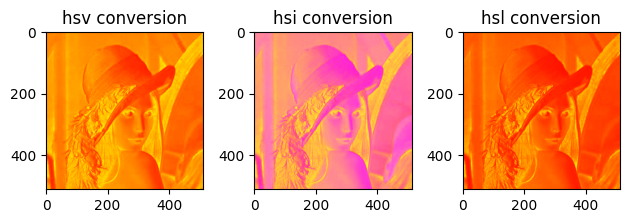

In [21]:
url = 'lena.jpg'

im = BaseImage(url)
im.get_conversions()

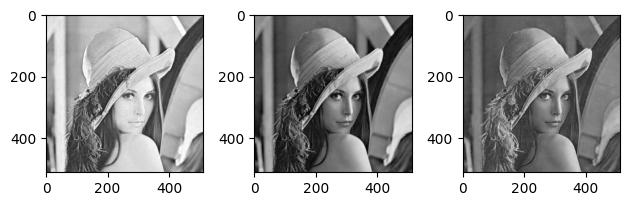

In [22]:
url = 'lena.jpg'

im = BaseImage(url)
im.show_layers()

Text(0.5, 1.0, '220')

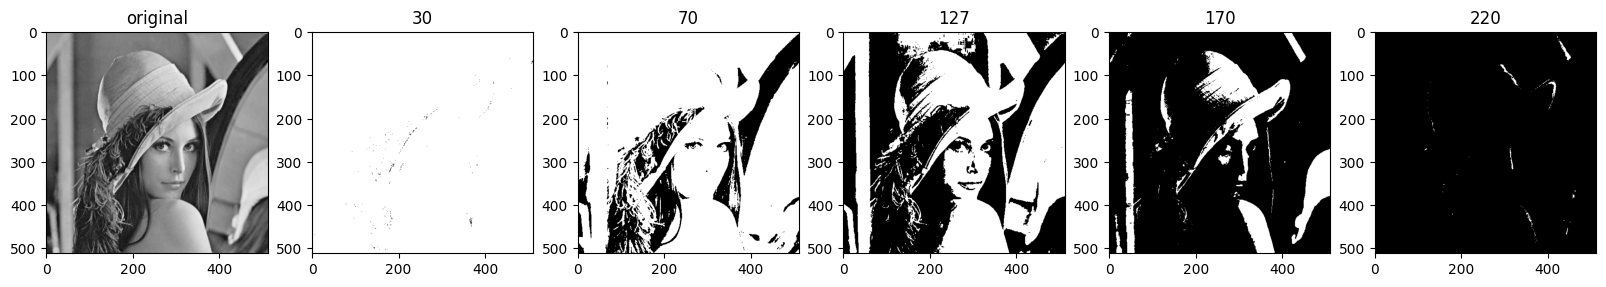

In [5]:
url = 'lena.jpg'

im = BaseImage(url)


gray = GrayScaleTransform(im).to_gray2()

thres = Thresholding(im)
thres0 = Thresholding(im)
thres1 = Thresholding(im)
thres2 = Thresholding(im)
thres3 = Thresholding(im)

thres.threshold(70)
thres0.threshold(30)
thres1.threshold(127)
thres2.threshold(170)
thres3.threshold(220)

f, ax_arr = plt.subplots(1,6, figsize=(20,20))
ax_arr[0].imshow(gray.data, cmap="gray")
ax_arr[0].set_title("original")
ax_arr[1].imshow(thres0.data, cmap="gray")
ax_arr[1].set_title("30")
ax_arr[2].imshow(thres.data, cmap="gray")
ax_arr[2].set_title("70")
ax_arr[3].imshow(thres1.data, cmap="gray")
ax_arr[3].set_title("127")
ax_arr[4].imshow(thres2.data, cmap="gray")
ax_arr[4].set_title("170")
ax_arr[5].imshow(thres3.data, cmap="gray")
ax_arr[5].set_title("220")
# plt.tight_layout()

9720.666720156249


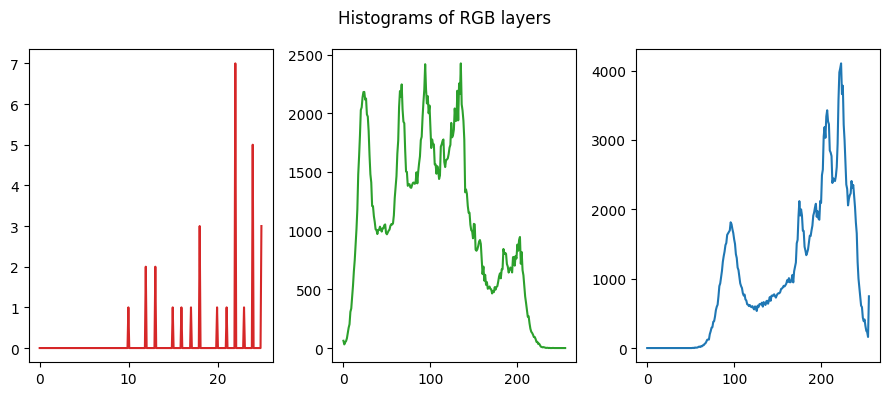

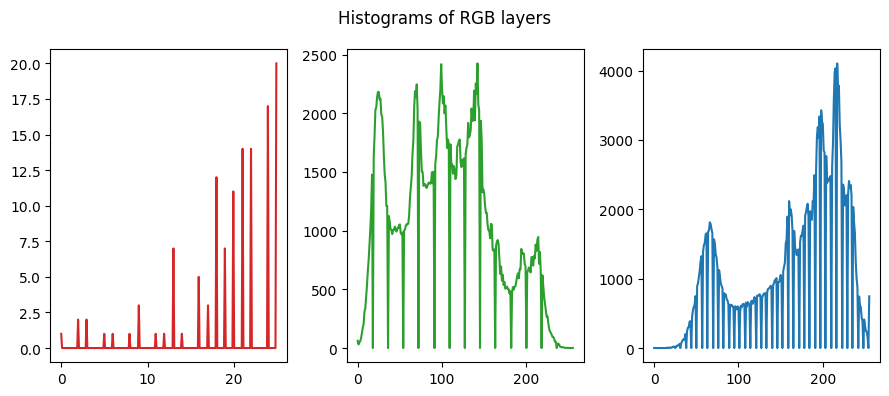

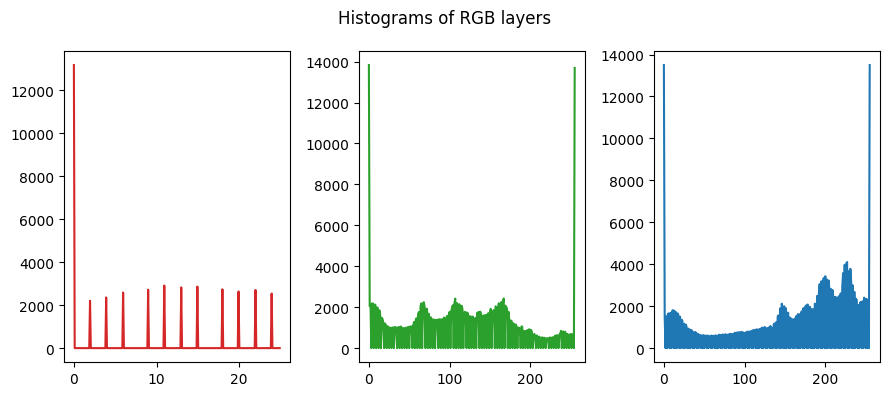

Text(0.5, 1.0, 'align with tail elimination')

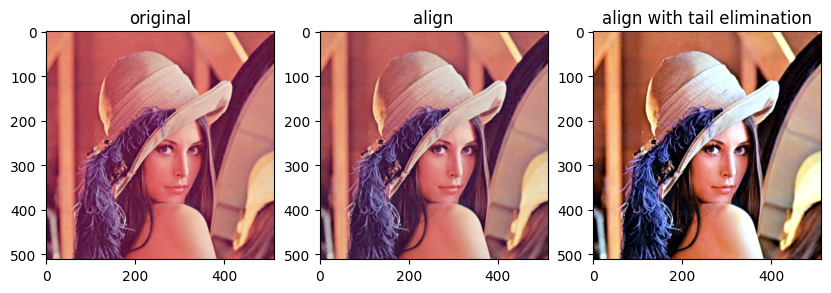

In [7]:
url = 'lena.jpg'

im = BaseImage(url)

# im.show_img()
al = ImageAligning(im)
al.align()
al.data.shape
# al.show_img()

co = ImageComparison(im)
print(co.compare_to(al, 0))

al2 = ImageAligning(im)
al2.align(tail_elimination=True)

Histogram(im.data).plot()
Histogram(al.data).plot()
Histogram(al2.data).plot()


f, ax_arr = plt.subplots(1,3, figsize=(10,10))
ax_arr[0].imshow(im.data)
ax_arr[0].set_title("original")
ax_arr[1].imshow(al.data)
ax_arr[1].set_title("align")
ax_arr[2].imshow(al2.data)
ax_arr[2].set_title("align with tail elimination")


145.42328101412642


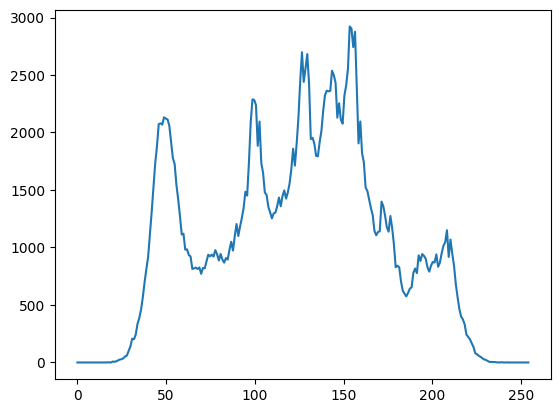

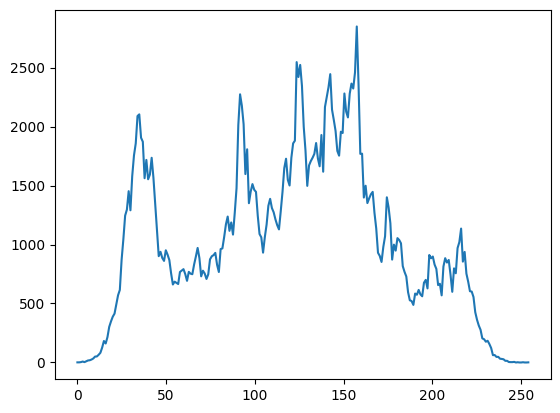

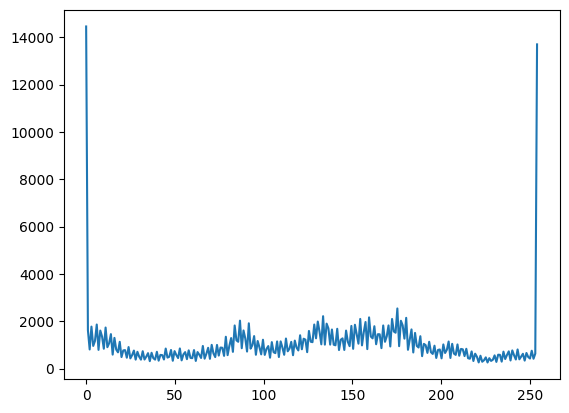

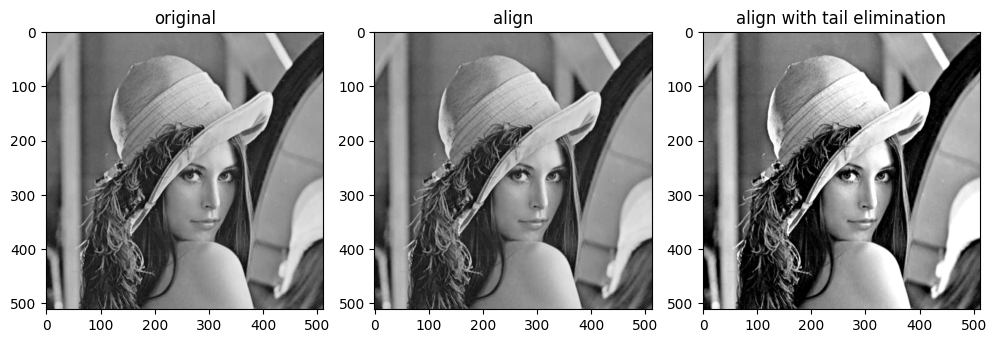

In [8]:
url = 'lena.jpg'

im = BaseImage(url)
g = GrayScaleTransform(im)
g.to_gray2()

al = ImageAligning(g)
al.align()
al.data.shape

co = ImageComparison(g)
print(co.compare_to(al, 1))

al2 = ImageAligning(g)
al2.align(True)


Histogram(g.data).plot()
Histogram(al.data).plot()
Histogram(al2.data).plot()

f, ax_arr = plt.subplots(1,3, figsize=(10,10))
ax_arr[0].imshow(g.data, cmap='gray')
ax_arr[0].set_title("original")
ax_arr[1].imshow(al.data, cmap='gray')
ax_arr[1].set_title("align")
ax_arr[2].imshow(al2.data, cmap='gray')
ax_arr[2].set_title("align with tail elimination")
plt.tight_layout()

In [10]:
url = 'lena.jpg'

im = BaseImage(url)

# len(im.data[0])""
im.data[0]

g = GrayScaleTransform(im)
g.to_gray2()

# im.data[...,0].shape[0]
# R = im.data[..., 0]
# R.shape[1]
im.data[...,2].shape
# g.data.shape

(512, 512)

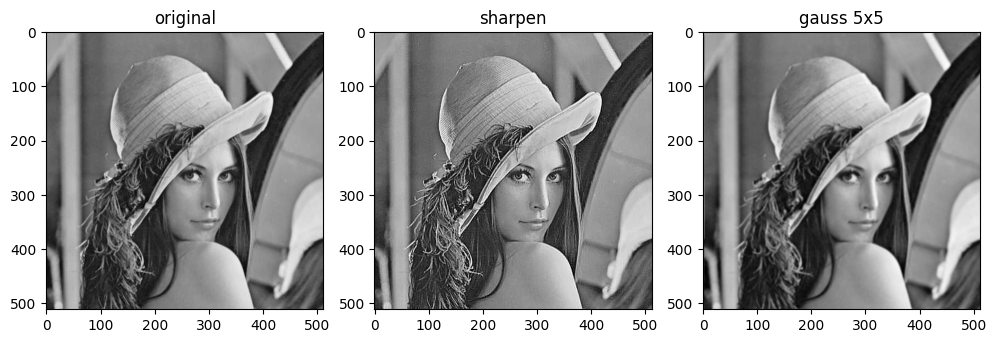

In [11]:
url = 'lena.jpg'

im = BaseImage(url)
# im.show_img()
img = GrayScaleTransform(im).to_gray2()
# img.gray_show_img()
# print(len(img.data[2]))
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
identity = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
# 1/16
gauss_3_3 = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]])
#  1/9
low_pass_filter = np.array([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]])
#  1/256
gauss_5_5 = np.array([[1, 4, 6, 4, 1],
                     [4, 16, 24, 16, 4],
                     [6, 24, 36, 24, 6],
                     [4, 16, 24, 16, 4],
                     [1, 4, 6, 4, 1]])
# conf.conv_2d(im, sharpen)
conf = ImageFiltration.conv(img, sharpen)
conf2 = ImageFiltration.conv(img, gauss_5_5, prefix = 1/256)

f, ax_arr = plt.subplots(1,3, figsize=(10,10))
ax_arr[0].imshow(img.data, cmap='gray')
ax_arr[0].set_title("original")
ax_arr[1].imshow(conf.data, cmap='gray')
ax_arr[1].set_title("sharpen")
ax_arr[2].imshow(conf2.data, cmap='gray')
ax_arr[2].set_title("gauss 5x5")
plt.tight_layout()


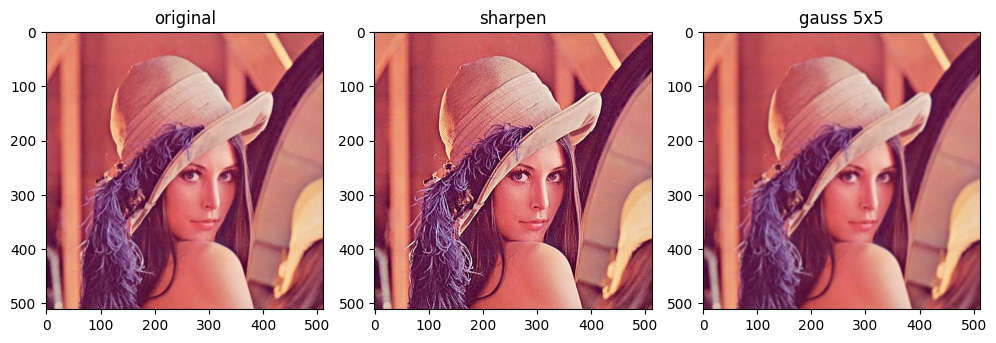

In [12]:
url = 'lena.jpg'

im = BaseImage(url)
# im.show_img()
sharpen = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
identity = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
# 1/16
gauss_3_3 = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]])
#  1/9
low_pass_filter = np.array([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]])
#  1/256
gauss_5_5 = np.array([[1, 4, 6, 4, 1],
                     [4, 16, 24, 16, 4],
                     [6, 24, 36, 24, 6],
                     [4, 16, 24, 16, 4],
                     [1, 4, 6, 4, 1]])
# conf.conv_2d(im, sharpen)
conf = ImageFiltration.conv(im, sharpen)
conf2 = ImageFiltration.conv(im, gauss_5_5, prefix = 1/256)

f, ax_arr = plt.subplots(1,3, figsize=(10,10))
ax_arr[0].imshow(im.data)
ax_arr[0].set_title("original")
ax_arr[1].imshow(conf.data)
ax_arr[1].set_title("sharpen")
ax_arr[2].imshow(conf2.data)
ax_arr[2].set_title("gauss 5x5")
plt.tight_layout()

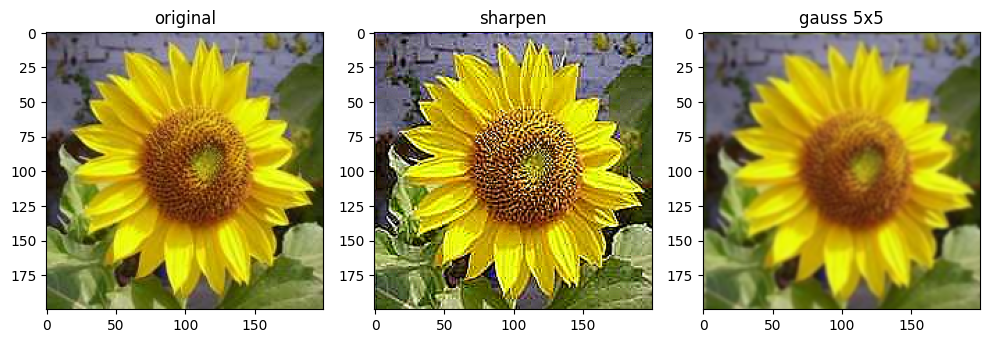

In [15]:
url = 'sunflower.jpg'

im = BaseImage(url)

sharpen = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
identity = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
#  1/9
low_pass_filter = np.array([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]])
# 1/16
gauss_3_3 = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]] )
#  1/256
gauss_5_5 = np.array([[1, 4, 6, 4, 1],
                     [4, 16, 24, 16, 4],
                     [6, 24, 36, 24, 6],
                     [4, 16, 24, 16, 4],
                     [1, 4, 6, 4, 1]])
# conf.conv_2d(im, sharpen)
conf = ImageFiltration.conv(im, sharpen)
conf2 = ImageFiltration.conv(im, gauss_5_5, prefix = 1/256)

f, ax_arr = plt.subplots(1,3, figsize=(10,10))
ax_arr[0].imshow(im.data)
ax_arr[0].set_title("original")
ax_arr[1].imshow(conf.data)
ax_arr[1].set_title("sharpen")
ax_arr[2].imshow(conf2.data)
ax_arr[2].set_title("gauss 5x5")
plt.tight_layout()

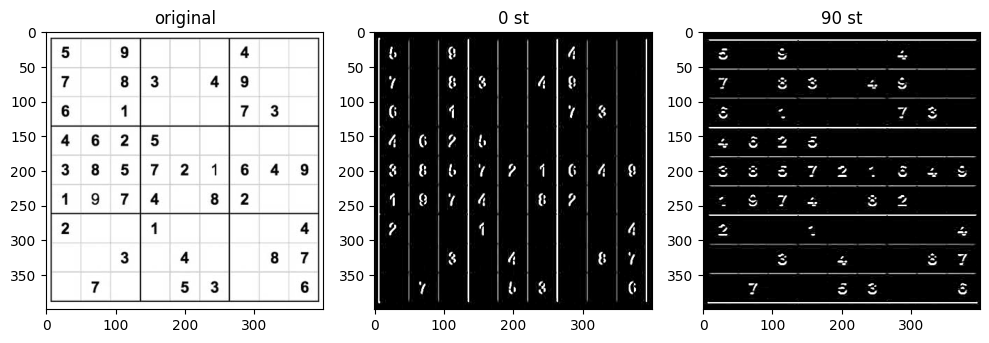

In [16]:
w_0 = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

w_45 = np.array([[0, 1, 2],
               [-1, 0, 1],
               [-2, -1, 0]])

w_90 = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

w_135 = np.array([[2, 1, 0],
                 [1, 0, -1],
                 [0, -1, -2]])

url = 'sudoku2.jpg'

im = BaseImage(url)
sudoku = GrayScaleTransform(im).to_gray2()
# im.show_img()

conf = ImageFiltration.conv(sudoku, kernel=w_0)
# conf.show_img()
conf2 = ImageFiltration.conv(sudoku, w_90)

f, ax_arr = plt.subplots(1,3, figsize=(10,10))
ax_arr[0].imshow(sudoku.data, cmap="gray")
ax_arr[0].set_title("original")
ax_arr[1].imshow(conf.data, cmap="gray")
ax_arr[1].set_title("0 st")
ax_arr[2].imshow(conf2.data, cmap="gray")
ax_arr[2].set_title("90 st")
plt.tight_layout()